In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
%matplotlib inline

## Lecture 13 Intro to Statistics

### Review of Lecture 10 

- Learn how to filter data with Pandas

- Learn how to process a series of data files using the glob library

- Learn how to generate formatted strings for output (random...)

### In this lecture we will:

- Learn some basic statisics 
    - accuracy and precision
    - probability of an event
    - probability distribution functions
    - mean, median and standard deviation
    - samples versus populations 
    - empirical versus theorectical distributions.

- Learn some useful functions in **NumPy** and **SciPy** for simulating distributions and calculating statistics.

## Basic statistical concepts

Some of this lecture is cribbed from Davis, J. (2002: Statistical and Data Analysis in Geology, 3rd Ed, Wiley, Hoboken).  Here's a good lecture for statistical methods in geoscience, an open source paper by Olea (2008) available in its entirety here:  https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf

While this is not a course for statistics (not even close), many Earth science data analyses require writing specific programs to calculate statistics, evaluate significance, and estimate _averages_ and _uncertainties_.

So, what is statistics? Statistics is the way we analyze, interpret and model data. To do it properly we need to understand a few concepts: 

1) **accuracy** versus **precision**:  accuracy is how close your data are to the "truth" while precision is the reproducibility of your data.  

2) **population** versus **sample**: the _population_ is the set of all possible outcomes of a given measurement (if you had an infinite number of data points), while the _sample_ is what you have - a finite number of data points.  

3) **probability**: Probability is the measure of how likely it is for a particular event to occur.  If something A is impossible, it has a probability $P(A) = 0$.  If something B is a certainty, it has a probability $P(B) = 1$. 

4) **Theoretical** versus **empirical** distributions: Empirical distributions are measured data. Theoretical distributions are analytical probabililty functions that can be described with a mathematical equation.  These can be applied to  data, allowing interpretations about the likelihood of observing a given measurement, whether  sets of data are "different" from theoretical or other empirical data sets and other powerful statistical tests.  

Now we will go through each of these concepts in a bit more detail. 

### 1. Accuracy and Precision

Mathematically let's use the value of $\pi$ as an example:
- Accurate and precise: 3.141592653 
- Accurate but imprecise: 3.1
- Inaccurate but precise: 3.5893627002
- Inaccurate and imprecise: 4 

In a collection if measured datasets, here's a good illustration of accracy and precision:

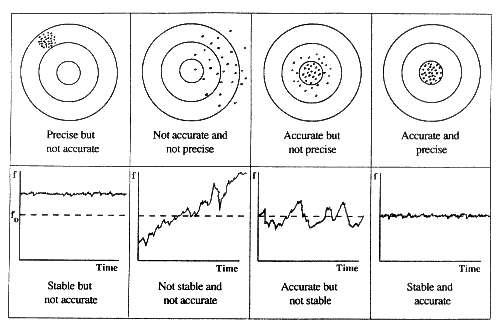

In [2]:
Image(filename='Figures/Statistics_accuracy_precision.gif')

While precision is obvious to assess, accuracy is not. To a large extent, what is behind statistics is an effort to evaluate **accuracy**.

### 2. Population versus Samples

- A **population** in statistics is every possible outcomes of a given measurement.
- A population can still be (and usually is) a subset of a larger population
- For example, for a study into HKU undergraduate students, the statistical population will be all the HKU students enrolled in undergradue courses
- A sample will be a subset of the possibilities, for example, the students enrolled in EASC2410.

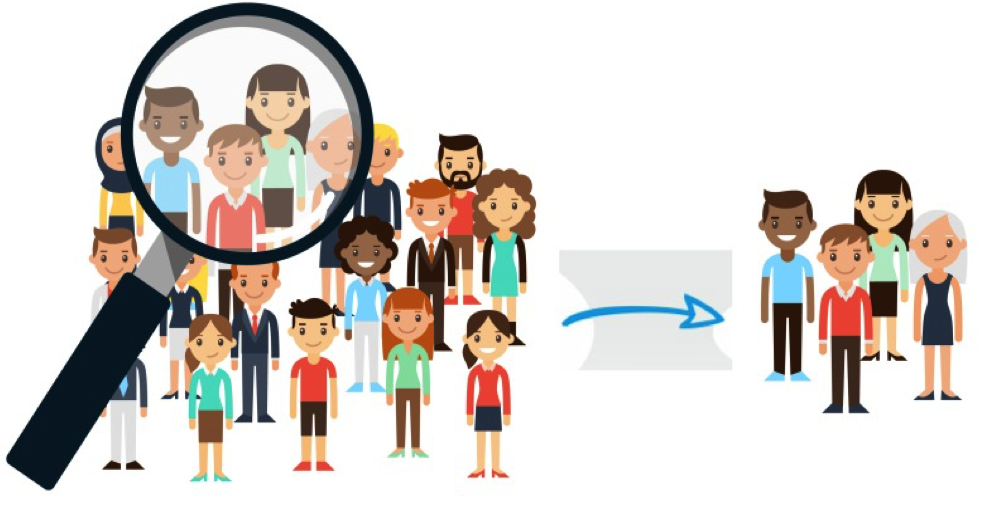

In [3]:
Image(filename='Figures/Statistics_population_sample.png')

It is quite straightforward to see that you may get different statistics with different samples of a population:

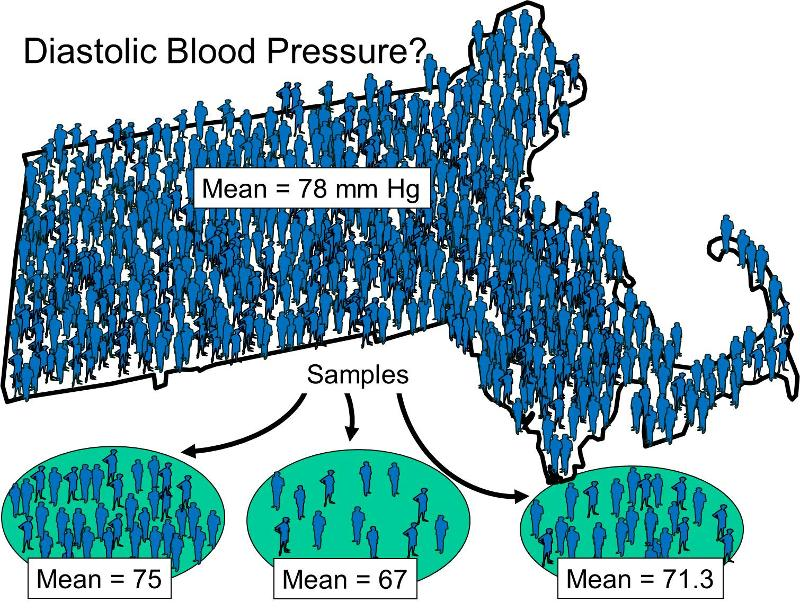

In [4]:
Image(filename='Figures/Statistics_sample_mean.jpg')

### 3. Probability and Expectation

**Probability** is the measure of how likely it is for a particular event to occur. If something is impossible, it has a probability of 0.  If it is a certainty, it has a probability of 1.  
    - For example, if you flip a coin, what are the odds that you're gonna get a "head"? Apparently it's $50\%$. 

Question: What's the probability of student birthdays?

**Expectation** is the probability-weighted average of all possible values.   
- example 1, let's play a "coin-flipping" game, if you get a "head", you win $1, otherwise if you get a "tail", you lose $2, then your expectation of winning money is $+1\times 50\% - 2\times 50\%=-0.5$, which means you are expected to give me 0.5$ after every game. Of course it's not fair. 
- example 2: Roulette
- example 3: Stock market

### 4. Distributions - theoretical versus empirical  

The population is what you would have if you had all possible outcomes - but you never do. We can describe the distribution of a population by using  equations which will predict, say, the fraction of measurements (the _density_) expected to fall within a given range ($x$ between 0 and 1), assuming a particular theoretical distribution.  This curve is called the _probability density function_.  

There are equations describing many different types of distributions and evaluating the equations gives us a theoretical distribution. In this lecture, we will look at a few common distributions (_binomial, uniform, normal,_ and  _log-normal_).   

Samples are finite collections of observations which may belong to a given distribution. In this lecture, it will be handy to   simulate 'measurements' by drawing 'observations' from a theoretical distribution, instead of making actual measurements.  This is the _Monte Carlo_ approach (after the gambling town).


Examples of theoretical versus empirical distributions:

#### 4.1 Binomial distribution:

#### a. Theoretical

Perhaps the most straight forward distribution is the _binomial_ distribution which describes the probability of a particular outcome when there are only two possibilities (yes or no, heads or tails, 1 or 0).   For example, in a coin toss experiment (heads or tails), if we flip the coin  $n$ times, what is the probability of getting $x$ 'heads'?  We assume that the probability $p$ of a head for any given coin toss is 50%; put another way $p$ = 0.5.  

The binomial distribution can be described by an equation: 

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}, x=0,1,2,...,n.$$

We can look at this kind of distribution by evaluating the probability for getting $x$ 'heads' out of $n$ attempts functions. Here we introduce a new type of function called the **lambda** function. We'll code the equation as a **lambda** function, and calculate the probability $P$ of a particular outcome (e.g., $x$ heads in $n$ attempts).  We can collect all the answers in a list and  plot the probability ($P$) versus the number of heads ($x$) out of $n$ attempts.  

Here is a **lambda** function called **Binomial**, which returns the probability of a given number of heads ($x$) out of $n$ attempts.  Note that for a coin toss, $p$ is 0.5, but other yes/no questions can be investigated as well (e.g., chance of winning the lottery given purchase of $n$ tickets). 

In [4]:
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
Probability = lambda x,n,p :(factorial(n)/(factorial(x)*factorial(n-x)))*(p**(x))*(1.-p)**(n-x)

Now we can use the **lambda** function named **Binomial** to look at the predicted likelihood of getting $x$ heads out of $n=12$ attempts (coin tosses) with a $p$ (probability) of 0.5. 



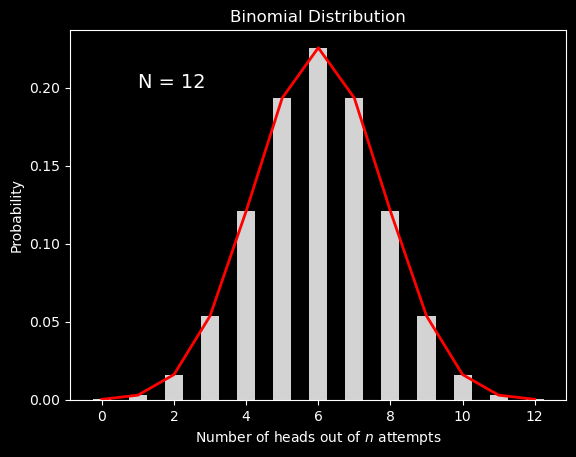

In [5]:
 # calculate the probability  of x heads in N attempts with a probability of P=0.5
Binomial = lambda x,n,p :(factorial(n)/(factorial(x)*factorial(n-x)))*(p**(x))*(1.-p)**(n-x)  

N,P=12,0.5 # total 12 tries, probability of head P(head) = 0.5
xs=np.arange(N+1) # range of test values x from 0,N
Probability=Binomial(xs,N,P) # Binomial distribution

plt.bar(xs,Probability,width=.5,color='lightgrey') # plot as bar plot
plt.plot(xs,Probability,'r-',linewidth=2) # plot as solid line
plt.xlabel('Number of heads out of $n$ attempts') # add labels
plt.ylabel('Probability') 

# place a note in upper left in axes coordinates with a fontsize of 14.
plt.text(1,.2, 'N = %i'%(N),  fontsize=14)
plt.title('Binomial Distribution');

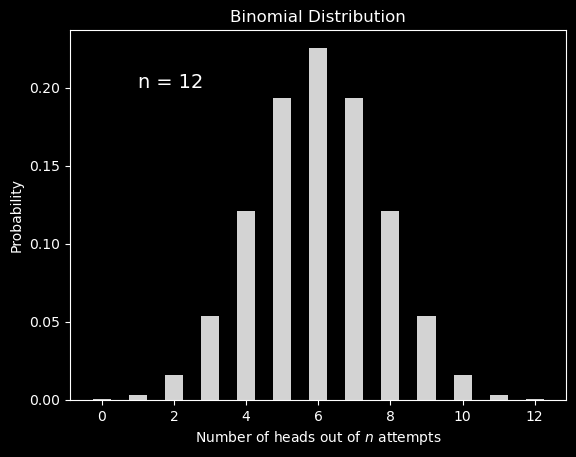

In [6]:
from scipy.special import factorial

def  Binomial(x,n,p):
    """
    Binomial distribution function
    work with numpy arrays
    """
    Prob=(factorial(n)/(factorial(x)*factorial(n-x)))*(p**(x))*(1.-p)**(n-x)
    return Prob

n,p = 12,0.5 # number of attempts in each trial, probability of getting a head
xs = np.arange(13)
Probability = Binomial(xs,n,p)

plt.bar(xs,Probability,width=.5,color='lightgrey') # plot as bar plot
plt.xlabel('Number of heads out of $n$ attempts') # add labels
plt.ylabel('Probability') 
# place a note in upper left in axes coordinates with a fontsize of 14.
plt.text(1,.2, 'n = %i'%(n),  fontsize=14)
plt.title('Binomial Distribution');

_Red line is the theoretical probability distribution function.  Grey bars are the same, but plotted as a bar graph._ 

Here I used both bar plot and line plot to show the outcome, in order to demonstrate two different ways of visualizing the results. Note that the red line is the _probability density function_.  

What you learn from this is that the most probable outcome is 6 out of 12 heads (with a $P$ of ~23%),   but other outcomes can very well occur.  

#### b. Empirical

One great feature about computers is that we can simulate a data sample to compare to our theoretical predictions. 
We can use the module **numpy.random** to generate examples of  simulated data sets in a process called **_Monte Carlo simulation_**.  We encountered **numpy.random( )** in previous lectures when we used the **random.random( )** function.  In this lecture we will discover a few more, starting with **random.binomial( )** which generates samples from a _binomial_ distribution. 

To use all the functions in **random** we must first import it.  

In [7]:
from numpy import random

To generate some  data, you could either patiently do the experiment with a coin toss, or we can just use the **random.binomial** function to simulate 'realistic' data.  

**random.binomial( )** requires 2 parameters, $n$ and $p$, with an optional keyword argument **size** (if **size** is not specified, it returns a single trial).   Each call to **random.binomial( )** returns the number of heads flipped in a single trial of $n$ coin tosses, given the probablity $p=0.5$. 

Let's try it with $n=12$ and $p=0.5$.  This little code block returns the number of heads out of $n$ attempts. You will get a different answer every time you run it.  It also gives the probabilty of getting that result from our lambda function **Binomial( )**. 

In [8]:
n, p = 12,0.5 # same as before
x=random.binomial(n,p,size=1) # size = 1 by default
print (x, 'heads, with a likelihood of: ',Binomial(x,n,p))

[11] heads, with a likelihood of:  [0.00292969]


As the number of times you repeat this 'experiment' approaches infinity, the distribution of outcomes will approach the theoretical distribution (i.e., you will get an average of 9 heads out of 12 attempts 5% of the time).   

So let's compare the results simulated via Monte Carlo for some number of experiments ($Nmc$) with the theoretical distribution.  To do this,  we pretend that each student in the class ($Nmc=20$) flips a coin $n=12$ times and reports the number of heads.  We can collect the number of heads flipped by each student in a list called **Simulated**.

[5 7 3 7 6 4 3 5 7 6 7 3 7 6 6 5 8 7 5 7]


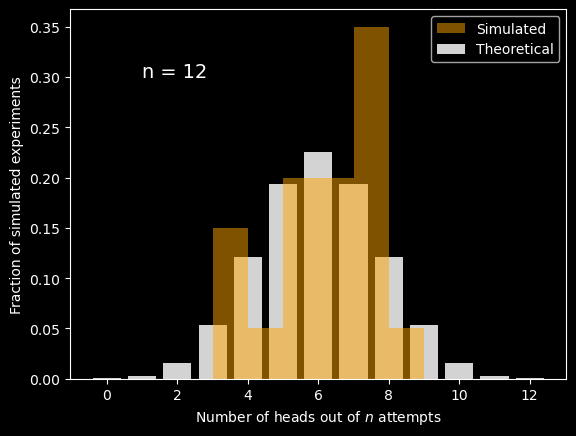

In [23]:
from numpy import random
# Theoretical Binomial distribution
Binomial = lambda x,n,p :(factorial(n)/(factorial(x)*factorial(n-x)))*(p**(x))*(1.-p)**(n-x)  

n,p = 12,0.5 # same as before
xs=np.arange(n+1) # range of test values x from 0,N
Probability=Binomial(xs,n,p) # Theoretical Binomial distribution

Nmc=20 # number of simulated experiments each with n attempts
Simulated=random.binomial(n,p,size=Nmc) # simulating the coin-flipping using the binomial() function


plt.bar(xs,Probability,color='lightgrey', label='Theoretical') # theoretical curve as bar graph
plt.hist(Simulated,density=True,color='orange',linewidth=3, label='Simulated',bins=xs,alpha=0.5) # note the normed key word - 
                  #------------#  this option normalizes the total to be unity

plt.xlabel('Number of heads out of $n$ attempts')
plt.ylabel('Fraction of simulated experiments')
plt.text(1,.3, 'n = %i'%(n),  fontsize=14)
plt.legend();

print(Simulated)

_Orange line is the Monte Carlo results.  Grey bar is the theoretical probability distribution function from before._

Notice that every time you repeat this, the Monte Carlo results are a little different.  And if you change $Nmc$ to be, say 10, you get more and more "weird" results.  But if you set $Nmc$ to 5000 - your results would look consistently  closer to the theoretical predictions. 

Also, something about the 'normed' keyword in **plt.hist( )**.  According to the **NumPy** documention for  **density**: If it is set to 'True', the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. The sum of the histogram values will not  equal  1 unless bins of unity width are used.

#### 4.2 Uniform Distributions  

There are many other distributions that we could play with. In the rest of the lecture, we will look at a few of the more common ones in Earth Science:   uniform and  normal distributions.   We'll approach each in the same way as for the binomial distributions starting with the theoretical distribution followed by a _Monte Carlo simulation_ of empirical results.  

#### a. Theoretical

A uniform distribution is pretty much what it sounds like.  All outcomes within the bounds of $a,b$ are equally likely. Outside those bounds, the probability is zero.   For example, when playing dice, what is the likelihood of getting a particular number of dots (1 in 6).

The analytical form for a uniform distribution is:

$$P=f(x,a,b)= \frac{1}{b-a},  x=a \rightarrow b$$

where $a$ and $b$ are bounds ($a \le x<b$). $P$ is the probability of getting a value of $x$.  It is zero if $x$ is not between $a$ and $b$, and  between $a$ and $b$ the probability is a constant. In fact the probability is  $1/n$ where $n$ is  $b-a$, the number of possible outcomes.

Say we have a die with 1 to 6 dots on each face.  The probability of getting one dot is 1 in 6, but getting seven dots is zero.  

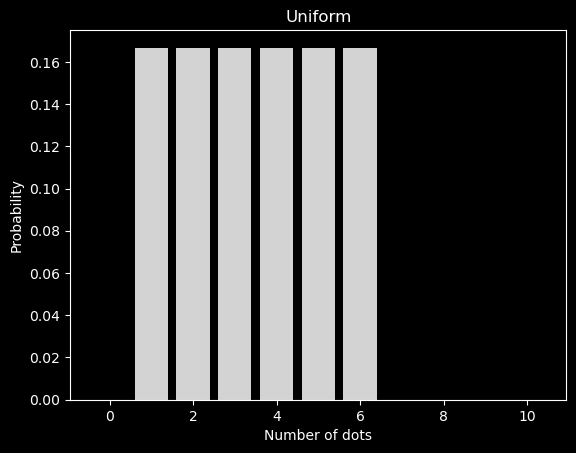

In [24]:
def Uniform(a,b): 
    """
    function for calculating P from a uniform distribution.  
    """
    Prob = (1./(b-a)) 
    return Prob
    
 # calculate the probability of returning a value x with a uniform distribution between a,b
xs=range(11) # range of possible number of dots from 1 to 10. 
a,b=1,7 # bounds for the uniform distribution
Probability=[] # container for the theoretical results. 
for x in xs: # step through test values
    if x not in range(a,b): # if x<a or x>b,  there is zero probability of rolling this number
        Probability.append(0) # save the probability
    else: # otherwise
        Probability.append(Uniform(a,b)) # get the probability from our little function
plt.bar(xs,Probability,color='lightgrey') # plot as a bar plot
plt.title('Uniform')
plt.xlabel('Number of dots')
plt.ylabel('Probability');   

#### Empirical

And now we can look at the Monte Carlo simulation of an empirical distribution using **random.uniform( )**. 

So here it is.    

[2 1 4 6 4 4 5 6 4 5 1 2 2 4 2 3 2 6 5 4]


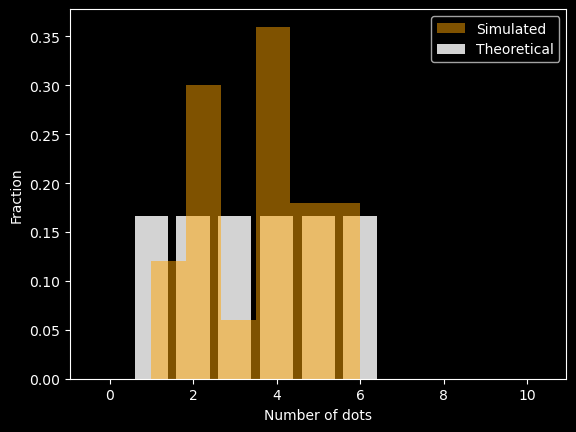

In [25]:
a,b=1,7 # keep the same bounds
Nmc=20 # number of "students" rolling the dice
Simulated=random.uniform(a,b,Nmc).astype('int') # get Nmc test values in one go.  :)
# the .astype(int) makes this an array of integers, as only integers are possible outcomes

# plot the theoretical uniform distribution between 1 and 7
plt.bar(xs,Probability, color='lightgrey',label='Theoretical')
# plot results as histogram normed to sum to unity and use histtype of 'step' to make it see-through
plt.hist(Simulated,density=True,histtype='bar',alpha = 0.5,color='orange',linewidth=3.,label='Simulated',bins=6) 
plt.xlabel('Number of dots')
plt.ylabel('Fraction')
plt.legend()

# print the simulated values
print(Simulated)

#### 4.3 Normal Distributions

Probably the most common distribution in real-life data is the so-called "normal" distribution (also known as a Gaussian distribution after the guy who thought it up). A normal (or Gaussian) distribution describes data, like measurement data, that have uncertainty associated with them - they are more or less precise.  There is some 'true' answer but all the measurements have some error. Imagine measuring the width of a sedimentary bed, or the length of a fossil thigh bone or the distance between two points.  The measurement data will have some _average_ (a.k.a. _central tendency_) and some degree of _spread_.  For normal distributions,  the _average_ is the arithmetic _mean_ $\mu$ and the spread is the _standard deviation_, $\sigma$.  

#### a. Theoretical: 

The analytical form for a normal distribution is:

$$P=f(x,\mu, \sigma)= \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},-\infty < x < \infty$$

We can put this equation into a lambda function called **Normal** and work on it as before with one small modification.  We can write the Normal _lambda_ function such that it returns an array if $x$ is passed as an array. 

In [26]:
def Normal(x,mu,sigma):
    """
    Normal Distribution Function
    """
    Prob = (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))
    return Prob

The following code calculates the probability of observing a measurement x from a normal distribution with **mu** and **sigma**.

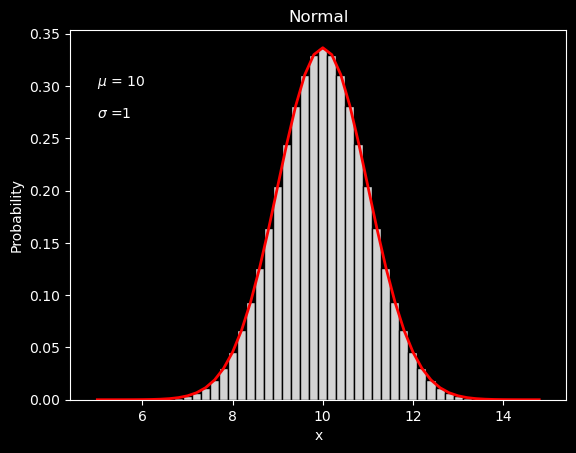

In [27]:
def Normal(x,mu,sigma):
    """
    Normal Distribution Function
    """
    Prob = (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))
    return Prob

mu,sigma,incr=10,1,.2 # set the mean,  standard deviation and bin width
xs=np.arange(5,15,incr) # make an array of test values
Probability=Normal(xs,mu,sigma) # get probabilities 
plt.bar(xs,Probability,width=incr,color='lightgrey', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.xlabel('x')
plt.ylabel('Probability')
plt.text(5,.3,'$\mu$ = '+str(mu)) # stick on some notes
plt.text(5,.27,'$\sigma$ ='+str(sigma))
plt.title('Normal');

The normal distribution looks a lot like the so-called 'bell curve' - the curve used for grading at HKU - because that is exactly what it is.  For example:

In [28]:
pp = Probability/sum(Probability)
sum(pp[xs>80])

0

#### Empirical

So let's compare the bell curve with some simulated data.  For this, we can use  **random.normal( )**.

In [29]:
mu,sigma=10,1 # set the mean,  standard deviation
Nmc=20 # number of monte carlo simultions
Simulated=random.normal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
plt.bar(xs,Probability,width=incr, edgecolor='k',label='Theoretical',color='lightgrey') # make the bar chart
plt.hist(Simulated, bins=20, density=True,histtype='step',color='orange',linewidth=2.,\
         bins=100,label='Simulated') # plot them
plt.legend();

SyntaxError: keyword argument repeated (386649750.py, line 6)

We talked about the mean and standard deviation of a theoretical distribution.  Now we  need to learn how to calculate them for our simulated sample (in case you don't know already!).  Note that for the population (as defined above), the average is $\mu$ but for our _sample_, it is $\bar x$:

$$ \bar{x} = \frac{\sum x_i}{N},$$

where $\sum_{i=1}^N$ means the sum of all individual values of $x$ from the first to the last.

Similarly, the standard deviation of the population is $\sigma$, while for our sample, it is $s$:  

$$s = \sqrt {\frac {1}{N}\sum_{i=1}^{N}(x_i-\bar x)^2 }$$

   Note that the _variance_ of the data is $s^2$ (and for the population it is $\sigma^2$).  

Using **NumPy**, You don't need to write programs to calculate the above equations by yourself, you can calculate the mean and standard deviation with the methods **.mean( )** and **.std( )** like this:

In [ ]:
print ('Mean of the simulated distribution = ',Simulated.mean()) 
print ('standard deviation of simulated distribution =',Simulated.std()) 

In [ ]:
plt.bar(xs,Probability,width=incr,color='lightgrey',label='Theoretical') # make the bar chart
#stderr=Simulated.std()/np.sqrt(len(Simulated))
plt.hist(Simulated,density=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.plot([Simulated.mean(),Simulated.mean()],[0,.5],'k-',linewidth=2,label='Mean')
plt.plot([Simulated.mean()-Simulated.std(),Simulated.mean()-Simulated.std()],[0,.5],
         'g--',linewidth=2,label='Standard deviation')
plt.plot([Simulated.mean()+Simulated.std(),Simulated.mean()+Simulated.std()],[0,.5],
         'g--',linewidth=2,label='_nolegend_') # notice how to suppress a legend entry!
plt.ylim(0,.5)
plt.legend(loc='best');

Notice two things: 

1) the standard deviation includes ~67% of the data (not 95%), that would be 1.97$\sigma$ (or 2-sigma, informally).  The $\pm \sigma$ bounds are the dashed lines in the above plot.  

2) the mean of our sample is generally not the same as the mean of the distribution ($\bar x \ne \mu$).  In fact, the 95% confidence bounds for the MEAN is related to the 'standard error', which is:

$s_e = \frac {s}{\sqrt N}$.


The 95% confidence bounds for the mean is given by 1.97$s_e$.  This means in practice that the mean will be more than 1.97$s_e$ away from true mean 5% of the time.    We could test that statement with another little Monte Carlo type simulation, but I leave that to student curiosity.   

Here are some very good examples of distributions and probabilities in daily life: https://galtonboard.com/probabilityexamplesinlife